# 1. 任务说明

**German Traffic Sign Recognition Benchmark（GTSRB）** 是一个用于交通标志识别的公开数据集。该数据集由德国的多所大学和研究机构联合创建，旨在促进自动驾驶和驾驶辅助系统中交通标志识别技术的发展和研究。

- 在实际应用背景中：在自动驾驶和高级驾驶辅助系统（ADAS）中，准确识别道路上的交通标志对于车辆的安全行驶和决策至关重要。
- 研究意义：GTSRB数据集为研究人员提供了一个标准化的平台，可以比较不同算法和模型的性能，推动技术进步。

# 2. 环境准备

在使用上述平台时，我们需要提前准备`torchvision`库。其在kaggle或者colab上已经完成了安装，可以直接使用，即

In [43]:
import torchvision

## 2.1 数据准备

在`torchvision`中，GTSRB数据集已经集成其中。我们可以通过代码直接下载。即

In [44]:
train_dataset = torchvision.datasets.GTSRB(
    root='./data',  # 数据集存放位置
    split='train',  # 使用训练集
    download=True,  # 是否下载
)

test_dataset = torchvision.datasets.GTSRB(
    root='./data',  # 数据集存放位置
    split='test',  # 使用训练集
    download=True,  # 是否下载
)

## 2.2 数据分析

对于一个新的数据，我们需要统计数据集的数量、规模以及类别数量。由于是图像数据集，我们还需要知道图像的基本形态。

---

我们可以通过已经读取的数据集，来查看数据的基本情况。

In [45]:
train_labels=[label for _, label in train_dataset ] #使用列表推导式从 train_dataset 中提取标签
unique_classes=set(train_labels) #使用集合(set)来获取唯一的标签类别,确保每个标签只出现一次
numclasses=len(unique_classes) #计算标签的数量，即类别数量



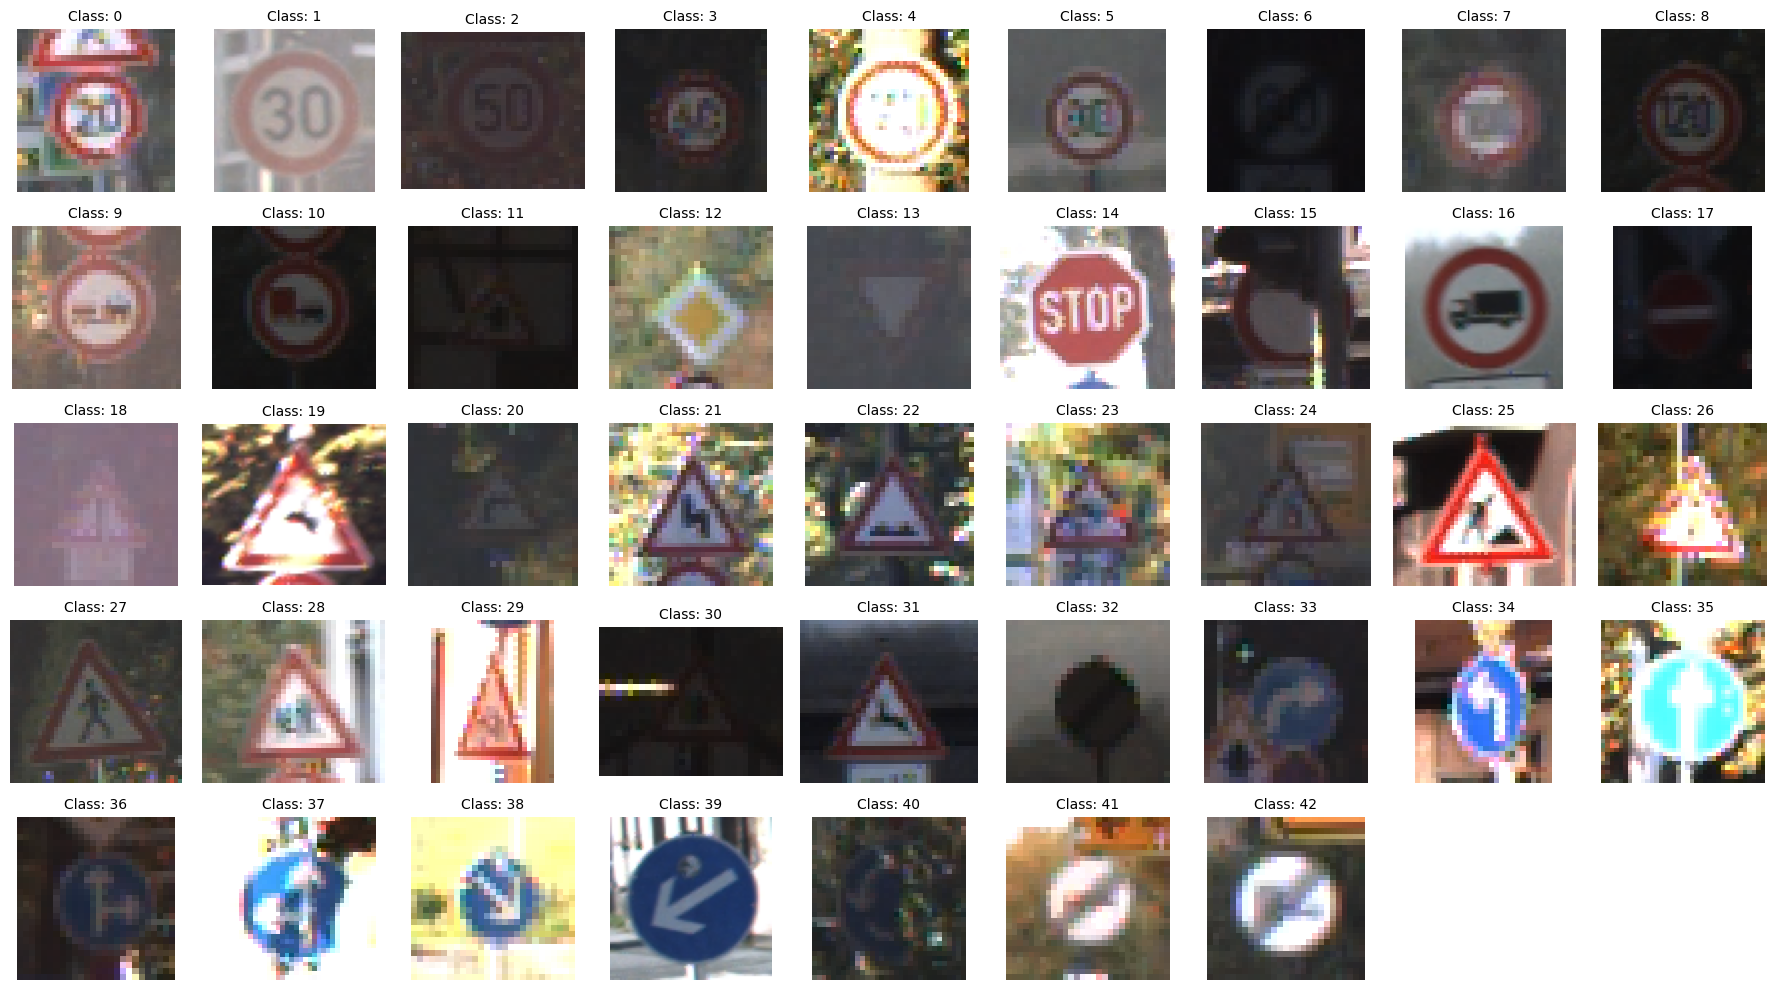

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 假设 samples_per_class 是一个包含43个PIL图像对象的列表
# 每个图像对象代表一个类别中的一个样本
samples_per_class = []

samples_per_class = []
added_labels = set()

for image, label in train_dataset:
    if label not in added_labels:
        samples_per_class.append(image)
        added_labels.add(label)
    if len(samples_per_class) == 43:
        break  # 如果已经收集了43个样本，停止遍历

# 创建一个3x3的子图网格，因为我们有43个类别，所以我们需要5x9的网格
fig, axes = plt.subplots(5, 9, figsize=(18, 10))

# 遍历每个类别，并在子图中显示每个类别的一个样本
for i, ax in enumerate(axes.flat):
    if i < len(samples_per_class):
        # 从每个类别中抽取一张数据
        sample = samples_per_class[i]
        if sample is not None:
            # 将PIL图像转换为numpy数组，以便在matplotlib中显示
            image = np.array(sample)
            # 在子图中显示图像
            ax.imshow(image, cmap='gray')
            ax.axis('off')  # 关闭坐标轴
            
            # 在图片上方添加类别标签
            ax.set_title(f"Class: {i}", fontsize=10)
        else:
            # 如果样本不存在，显示一个空的子图
            ax.axis('off')
    else:
        # 如果类别数量超过了子图的数量，关闭多余的子图
        ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()



<details>
<summary>可以看到，数据集一共有43类。我们可以从每一类中抽取一张数据，打印出来如下</summary>


![数据集](img\image1.png)

实际上，我们可以列出表格来说明每类的意义所在

数据标签的意义
|数据标签|意义|外观描述|
|--|--|--|
|0|限速20 km/h|圆形红边白底，表示限速20公里/小时|
|1|限速30 km/h|圆形红边白底，表示限速30公里/小时|
|2|限速50 km/h|圆形红边白底，表示限速50公里/小时|
|3|限速60 km/h|圆形红边白底，表示限速60公里/小时|
|4|限速70 km/h|圆形红边白底，表示限速70公里/小时|
|5|限速80 km/h|圆形红边白底，表示限速80公里/小时|
|6|解除限速80 km/h|圆形白底黑杠，表示解除限速80公里/小时|
|7|限速100 km/h|圆形红边白底，表示限速100公里/小时|
|8|限速120 km/h|圆形红边白底，表示限速120公里/小时|
|9|禁止超车|圆形红边白底，表示禁止超车|
|10|禁止货车超车|圆形红边白底，表示禁止货车超车|
|11|交叉路口优先|倒三角形红边白底，表示交叉路口优先|
|12|主路|菱形黄底黑边，表示主干道|
|13|让行|倒三角形红边白底，表示让行|
|14|停车|八角形红底白字，表示停车|
|15|禁止车辆进入|圆形红底白杠，表示禁止车辆进入|
|16|禁止货车进入|圆形红底白杠货车标志，表示禁止货车进入|
|17|禁止通行|圆形红底白杠，表示禁止通行|
|18|危险|三角形红边白底，表示危险，需谨慎行驶|
|19|左急弯|三角形红边白底，表示左急弯|
|20|右急弯|三角形红边白底，表示右急弯|
|21|连续弯路|三角形红边白底，表示连续弯路|
|22|不平路面|三角形红边白底，表示不平路面|
|23|路面湿滑|三角形红边白底，表示路面湿滑|
|24|道路变窄|三角形红边白底，表示道路变窄|
|25|施工|三角形红边白底，表示前方施工|
|26|红白相间|红白相间斜杠，表示前方有交通控制区|
|27|行人|三角形红边白底，表示行人通行标志|
|28|儿童|三角形红边白底，表示儿童出没，小心驾驶|
|29|自行车|圆形红边白底，表示自行车道|
|30|注意冰雪|三角形红边白底，表示前方路面可能有冰雪|
|31|动物|三角形红边白底，表示动物出没标志|
|32|解除限速|圆形白底黑杠，表示解除限速|
|33|向右转|圆形蓝底白箭头，表示车辆向右转|
|34|向左转|圆形蓝底白箭头，表示车辆向左转|
|35|直行|圆形蓝底白箭头，表示车辆直行|
|36|直行或向右|圆形蓝底白箭头，表示车辆直行或向右|
|37|直行或向左|圆形蓝底白箭头，表示车辆直行或向左|
|38|靠右行驶|圆形蓝底白箭头，表示车辆靠右行驶|
|39|靠左行驶|圆形蓝底白箭头，表示车辆靠左行驶|
|40|环岛|圆形蓝底白箭头，表示车辆需绕行环岛|
|41|禁止超车解除|圆形白底黑杠，表示禁止超车解除|
|42|禁止货车超车解除|圆形白底黑杠货车标志，表示禁止货车超车解除|

</details>

之后，我们统计了每类数据的数量，展示为直方图如下：

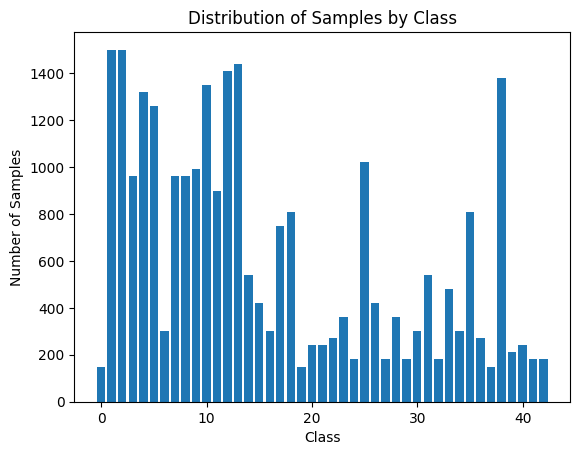

In [11]:

# 假设我们有一个列表，其中包含了所有的标签
train_labels = [label for _, label in train_dataset]

# 使用 numpy 中的 bincount 函数来统计每个标签的数量
unique_classes, class_counts = np.unique(train_labels, return_counts=True)

# 绘制直方图
plt.bar(unique_classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples by Class')
plt.show()



可以看出，每类数据中，样本数量从1500分布至150。这说明：

1. 每类样本基本充足
2. 存在一定的数据不均衡情况

进而，我们可以查看图像的尺寸：通过将图像长宽绘制到二维图像中进行展示如下

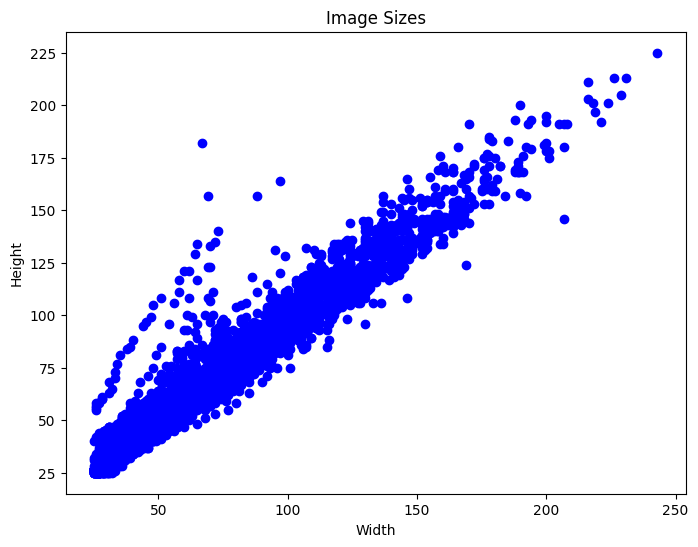

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 绘制图像尺寸的二维表示
plt.figure(figsize=(8, 6))
sizes = [image.size for image, _ in train_dataset]
for width, height in sizes:
    plt.plot(width, height, 'bo')
# for image, label in train_dataset:
#     (width, height)=image.size
#     plt.plot(width, height, 'bo')

plt.title('Image Sizes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()



可以看出我们的图像尺寸分布还是存在较大的差异性。其中，有$25\times 25$的小图片，也有$225\times 243$的大图片。但幸运的是，大部分图像的比例较为一致。但依然存在一些比例不一致的图像。

## 2.4 数据特点

GTSRB数据集中存在一些挑战性，主要体现在多样性和复杂性上。从数据集中收集一些典型的图像如下所示：

![alt text](\img\image2.png)


# 3. 获取基线(baseline)

Baseline在项目开发中至关重要，其主要包含两个目的：

1. 对问题有一个初始的解决方案，建立一个初始的参考点，便于后续比较和改进
2. 对基线的结果进行分析，来找出当前的模型可能有哪些不足，以确定改进方向

## 3.1 实现简单的模型

在基线的处理中，我们通常可以用较为简单的模型和设置，来获取初始结果。

### 3.1.1 数据预处理

在数据预处理部分，我们首先可以利用torchvision进行数据的下载和读取。

而后，我们可以适当调整图像，例如将图像转换为灰度图，减少模型的复杂程度；同时，需要将所有图像统一调整为统一尺寸，并且需要对像素值进行归一化处理。最后，展开图像为一维向量，以便输入到MLP中。

这里，我们可以使用torchvision中的函数来实现上面的结果，一个示例代码如下所示。

In [2]:
import torch
import torchvision
from torchvision import transforms

# 定义数据预处理的转换
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 转为灰度图
    transforms.Resize((32, 32)),  # 调整为 32x32 大小
    transforms.ToTensor(),  # 转换为 PyTorch 张量
    transforms.Lambda(lambda x: x.view(-1))  # 展平为一维向量
])

# 重新加载数据集并进行预处理
train_dataset=torchvision.datasets.GTSRB(root='./data', split='train', transform=transform)
test_dataset=torchvision.datasets.GTSRB(root='./data', split='test', transform=transform)

#创建数据加载器
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

### 3.1.2 模型选择

我们在基线选择中，可以选择一个相对简单的MLP模型，例如单隐藏层模型。

同时，我们需要设置训练损失，以及优化器。

同时，设置一个相对较小的学习率，例如1e-3，并设置一个足够大的batch size，和默认的epoch number。

In [40]:
#选择一个相对简单的MLP模型，例如单隐藏层模型。同时，我们需要设置训练损失，以及优化器。
import torch.nn as nn
import torch.optim as optim

# 定义MLP模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
# 设置超参数
input_size = 32 * 32  # 输入大小，根据您的预处理，图像被展平为一维向量
hidden_size = 128  # 隐藏层大小
output_size = 43  # 输出大小，根据GTSRB数据集的类别数量
learning_rate = 1e-3
batch_size = 64
num_epochs = 15
# 创建模型实例
model = MLP(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # 训练模型
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # 将图像展平为一维向量
#         images = images.view(-1, input_size)

#         # 前向传播
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         # 反向传播和优化
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # 打印训练进度
#         if (i + 1) % 100 == 0:
#             print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

### 3.1.3 模型训练与评估

进而，我们可以对模型进行训练，并记录下相关的参数和结果。

除了代码之外，我们这里介绍一种非常好用的log工具：`tensorboard`

In [41]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs')  # 指定日志目录
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 将图像展平为一维向量
        images = images.view(-1, input_size)

        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印训练进度
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        # 将损失值写入 tensorboard 日志
        writer.add_scalar('Training Loss', loss.item(), epoch * len(train_loader) + i)

    # 测试模型
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.view(-1, input_size)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Test Accuracy: {accuracy:.2f}%')

        # 将准确率写入 tensorboard 日志
        writer.add_scalar('Test Accuracy', accuracy, epoch)

# 关闭 tensorboard 日志
writer.close()
# 保存模型
torch.save(model.state_dict(),'model.pth')


Epoch [1/15], Step [100/417], Loss: 3.3377
Epoch [1/15], Step [200/417], Loss: 2.7890
Epoch [1/15], Step [300/417], Loss: 2.2674
Epoch [1/15], Step [400/417], Loss: 2.1781
Test Accuracy: 38.92%
Epoch [2/15], Step [100/417], Loss: 1.8550
Epoch [2/15], Step [200/417], Loss: 1.6769
Epoch [2/15], Step [300/417], Loss: 1.7666
Epoch [2/15], Step [400/417], Loss: 1.7767
Test Accuracy: 56.25%
Epoch [3/15], Step [100/417], Loss: 1.4968
Epoch [3/15], Step [200/417], Loss: 1.4694
Epoch [3/15], Step [300/417], Loss: 1.2728
Epoch [3/15], Step [400/417], Loss: 1.1075
Test Accuracy: 61.18%
Epoch [4/15], Step [100/417], Loss: 0.9544
Epoch [4/15], Step [200/417], Loss: 0.7770
Epoch [4/15], Step [300/417], Loss: 0.7770
Epoch [4/15], Step [400/417], Loss: 0.9497
Test Accuracy: 65.81%
Epoch [5/15], Step [100/417], Loss: 0.6815
Epoch [5/15], Step [200/417], Loss: 0.9297
Epoch [5/15], Step [300/417], Loss: 0.7907
Epoch [5/15], Step [400/417], Loss: 0.8514
Test Accuracy: 70.60%
Epoch [6/15], Step [100/417], 

In [54]:
from  PIL import Image
import numpy as np

# 实例化模型

model = MLP(input_size, hidden_size, output_size)

# 加载模型权重
model_state_dict = torch.load('model.pth',weights_only=True)
model.load_state_dict(model_state_dict)
model.eval()

# 加载要推理的图片
image = Image.open('test.png')
image_tensor = transform(image)

# 进行推理
with torch.no_grad():
    output = model(image_tensor.unsqueeze(0))

#输出图片类别

output = torch.argmax(output, dim=1)

print(output)

tensor([14])


## 3.2 结果分析

对于结果的分析至关重要，我们一切的创新都应源自于实际的问题和现象。

通常，我们可以从三个方面来全面评估性能。

1. 模型与数据的匹配程度：判断过拟合或者欠拟合
2. 结果的可视化分析
3. 更多的评价指标

### 3.2.1 模型与数据的匹配程度

我们要对比测试集与训练集之间的性能差异，以得出数据与模型匹配程度的定性结论。

### 3.2.2 模型调整与性能比较

模型调整包括模型结构的调整与超参数的调整。

在结构调整中，我们可以增加/减少隐藏层的神经元，或者是改变激活函数，或者是加入正则化等等内容

在参数调整中，针对学习率、批大小以及epoch进行调整测试，来得到结果。

而调整方向的依据，固然可以依赖于NAS，但是更多情况下，应当从之前的分析结论中定性。

### 3.2.3 使用可视化工具

我们可以把一些分错的样本打印出来，用瞪眼法来观察模型在哪方面有所欠缺，从而分析出原因。如果能够上升到理论的高度，就是一个非常好的创新。

同时，我们可以用一些统计工具来进行定量的分析。

例如，我们可以使用混淆矩阵来实现结果，从而判断在哪些类别中容易混淆，在哪些类别中容易产生误差等等。从而可以做出针对性的改进。我们使用sklearn库来绘制混淆矩阵

In [59]:
test_labels=[label for _, label in test_dataset ] #使用列表推导式从 test_dataset 中提取标签
print(test_labels)
outputs = []
for image, _ in test_dataset:
        image_tensor = transform(image)
        with torch.no_grad():
                output = model(image_tensor.unsqueeze(0))
                output = torch.argmax(output, dim=1)
                outputs.append(output[0].item())

print(outputs)



[16, 1, 38, 33, 11, 38, 18, 12, 25, 35, 12, 7, 23, 7, 4, 9, 21, 20, 27, 38, 4, 33, 9, 3, 1, 11, 13, 10, 9, 11, 5, 17, 34, 23, 2, 17, 3, 12, 16, 8, 7, 30, 18, 12, 24, 25, 3, 10, 18, 8, 25, 13, 15, 9, 13, 35, 5, 26, 9, 16, 38, 10, 4, 9, 15, 9, 26, 2, 5, 28, 11, 25, 30, 34, 5, 12, 1, 10, 25, 25, 21, 33, 25, 7, 10, 35, 3, 7, 22, 13, 3, 1, 2, 14, 12, 32, 3, 38, 9, 33, 1, 10, 5, 11, 33, 4, 35, 25, 33, 4, 1, 14, 16, 10, 30, 3, 27, 29, 1, 17, 13, 7, 1, 8, 2, 10, 10, 30, 1, 6, 36, 3, 14, 13, 11, 10, 18, 40, 2, 38, 41, 4, 6, 18, 17, 25, 2, 41, 11, 21, 7, 24, 11, 25, 17, 3, 6, 9, 7, 4, 13, 16, 4, 25, 18, 9, 13, 14, 29, 17, 13, 38, 26, 25, 33, 1, 3, 40, 13, 2, 8, 4, 36, 25, 20, 25, 18, 1, 10, 8, 10, 29, 12, 38, 31, 2, 8, 38, 18, 28, 17, 9, 4, 1, 17, 9, 2, 31, 13, 15, 15, 38, 25, 5, 25, 13, 10, 5, 4, 10, 2, 4, 5, 1, 14, 12, 12, 5, 8, 36, 25, 13, 33, 18, 33, 19, 12, 30, 4, 18, 12, 13, 20, 0, 10, 40, 5, 8, 12, 38, 20, 14, 0, 36, 34, 28, 35, 13, 25, 15, 35, 14, 18, 25, 1, 12, 5, 25, 2, 18, 18, 18, 34,

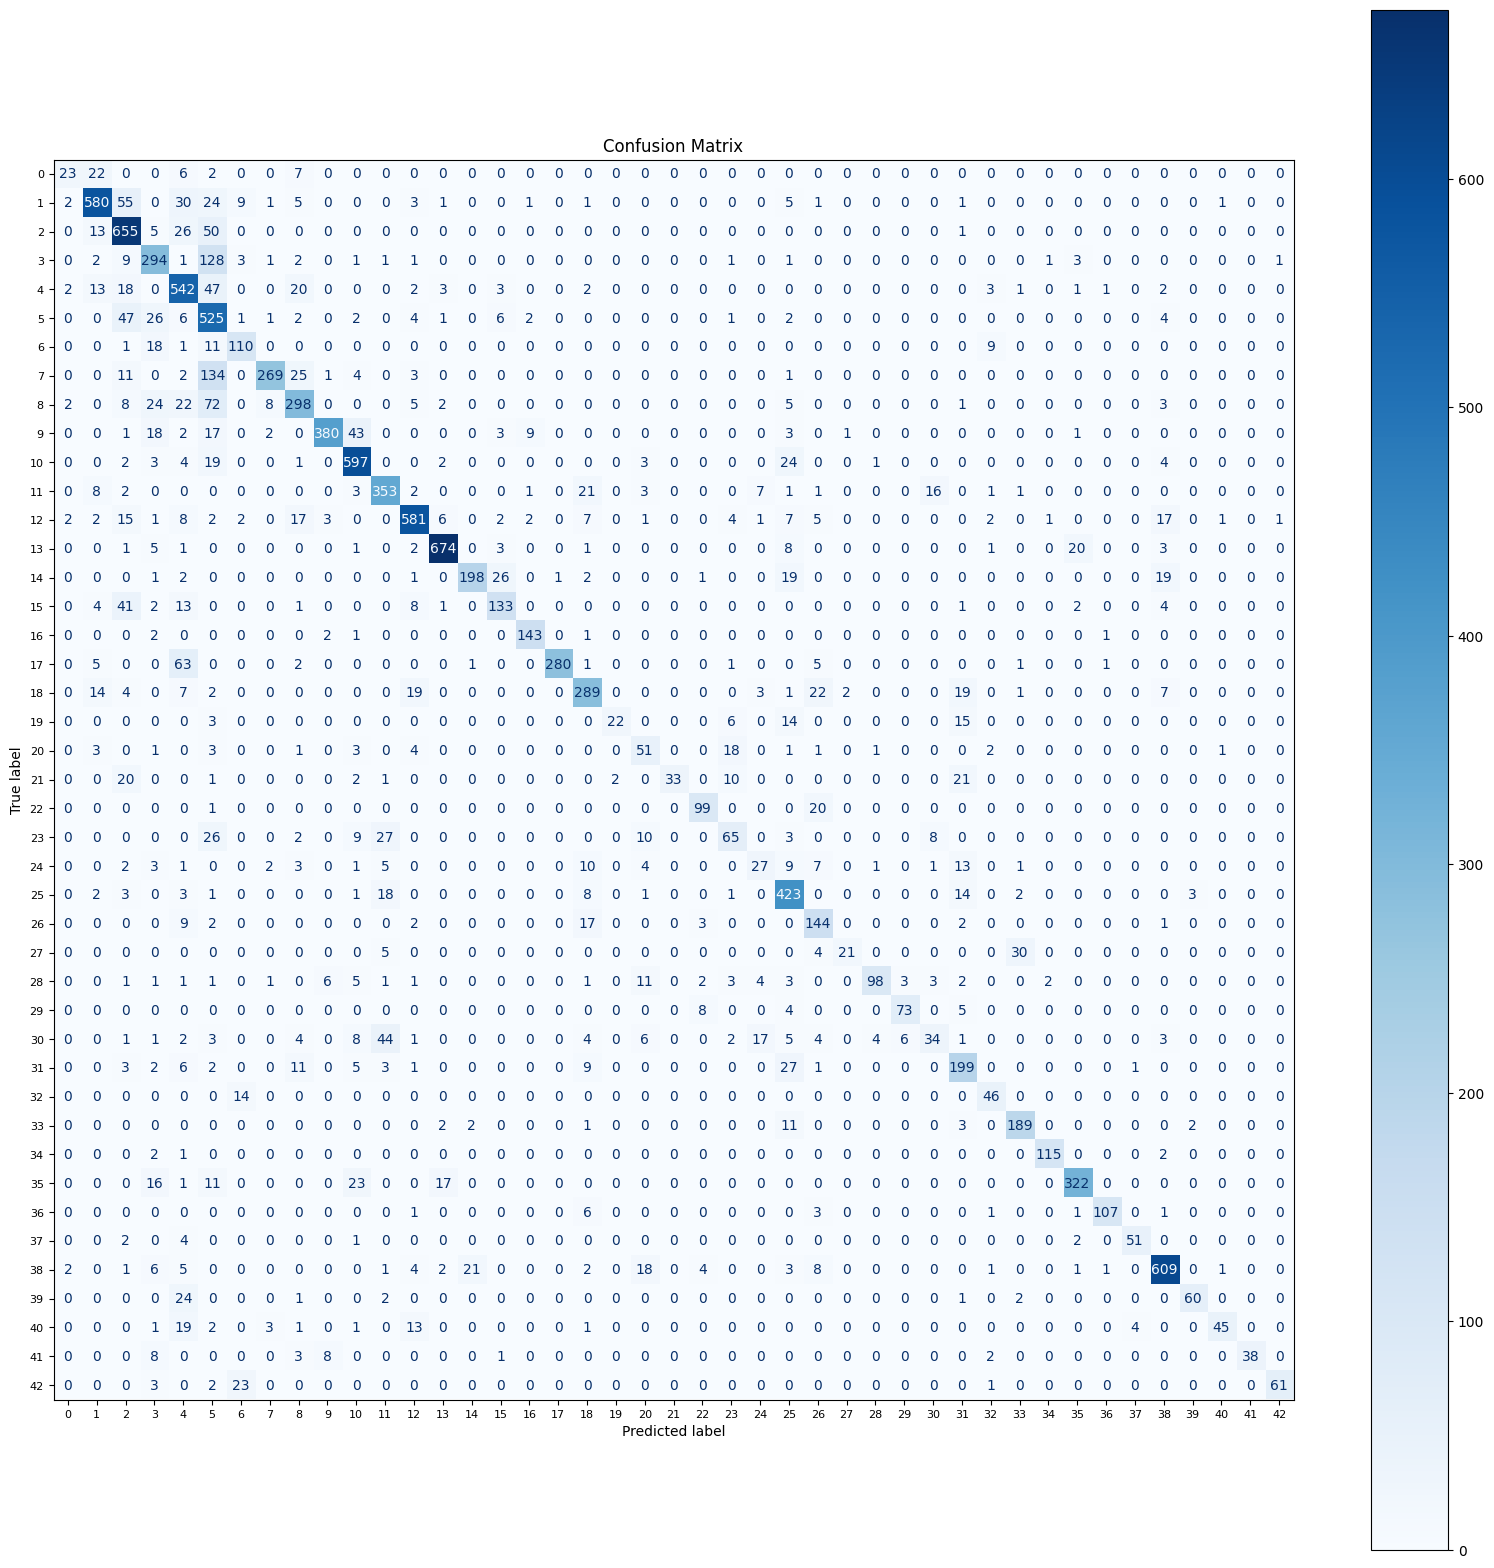

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 示例数据：实际标签和预测结果
true_labels = test_labels  # 真实标签
predicted_labels = outputs  # 预测结果

# 计算混淆矩阵
cm = confusion_matrix(true_labels, predicted_labels)

# 使用 sklearn 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(20, 20))  # 可以根据需要调整大小
# 使用 matplotlib 绘制
disp.plot(cmap=plt.cm.Blues,ax=ax)  # 设置颜色为蓝色渐变
# 设置刻度标签大小和间隔
plt.xticks(np.arange(43), fontsize=8)
plt.yticks(np.arange(43), fontsize=8)
# 设置标题
plt.title("Confusion Matrix")
plt.show()

In [66]:
import plotly.express as px

true_labels = test_labels  # 真实标签
predicted_labels = outputs  # 预测结果

cm = confusion_matrix(true_labels, predicted_labels)

fig = px.imshow(cm, labels=dict(x="Predicted", y="True", color="Count"),
                x=[str(i) for i in range(len(cm))], y=[str(i) for i in range(len(cm))])
fig.show()

ModuleNotFoundError: No module named 'plotly'

又或者说，我们可以用双色直方图来观察结果中哪些类别的分类准确率较低。例如

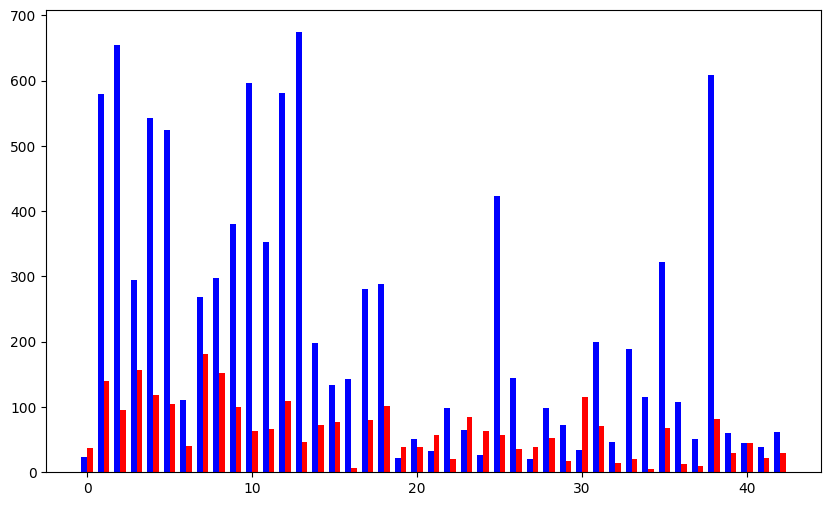

In [62]:
# 获取每个类别的正确分类数量和错误分类数量
true_labels = test_labels # 真实标签
predicted_labels = outputs # 预测结果

# 计算混淆矩阵
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

correct_counts = np.diag(cm)  # 混淆矩阵对角线元素表示正确分类的数量
incorrect_counts = cm.sum(axis=1) - correct_counts  # 每行总和减去对角线元素表示错误分类的数量

# 绘制双色直方图
x = np.arange(len(unique_classes))  # 类别数量，用作 x 轴坐标
width = 0.35  # 每个柱子的宽度

# 创建一个新的图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制每个类别的正确分类柱状图
rects1 = ax.bar(x - width/2, correct_counts, width, label='Correct', color='b')

# 绘制每个类别的错误分类柱状图
rects2 = ax.bar(x + width/2, incorrect_counts, width, label='Incorrect', color='r')

### 3.2.4 更多的评价指标

例如，我们可以采用召回、精度和F1分数来进一步的评价性能。在一个二分类的任务中，样本被划分为”正例“和”负例“，从而我们可以定义出Recall、Precision的定义如下：

- Recall：
    
    召回率表示被模型正确识别的正样本（True Positives, TP）在所有实际为正样本（True Positives + False Negatives, TP + FN）中的占比
    
    $$
    R=\frac{TP}{TP+FN}
    $$
    
- Precision：
    
    精度表示被模型识别为正样本的样本中，实际为正样本的比例。
    
    $$
    P=\frac{TP}{TP+FP}
    $$
    

然而，在多分类中，没有”正例“和”负例“的概念，我们需要对结果进行一定的改进。

- 第i类的Recall：
    
    $$
    R_i=\frac{TP_i}{TP_i+FN_i}
    $$
    
- 第i类的Precision：
    
    $$
    P_i=\frac{TP_i}{TP_i+FP_i}
    $$
    

进而，我们可以得到第i类的F1分数为：

$$
F1_i=2\times\frac{P_i\cdot R_i}{P_i +R_i}
$$

那么全局的F1分数即为平均F1，即

$$
F1 =\frac{\sum F1_i}{n}
$$

同理，我们也可以得到全局的精度和召回，即

$$
P=\frac{\sum P_i}{n}\\
R=\frac{\sum R_i}{n}
$$

根据这个结果，我们可以更加深入的分析结果的不足之处。

下面，我们给出了一个评估代码的示例

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 示例数据：多类别分类的实际标签和预测结果
true_labels = test_labels
predicted_labels = outputs

# 计算多类别的精度、召回率和 F1-score（macro 平均）
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')

print(f"Macro Precision: {precision_macro:.2f}")
print(f"Macro Recall: {recall_macro:.2f}")
print(f"Macro F1-score: {f1_macro:.2f}")
target_names = []
#类别
for i in unique_classes:
    target_names.append("class:"+str(i))
# 生成完整的分类报告
report = classification_report(true_labels, predicted_labels, target_names=target_names)

print(report)

Macro Precision: 0.81
Macro Recall: 0.71
Macro F1-score: 0.74
              precision    recall  f1-score   support

     class:0       0.70      0.38      0.49        60
     class:1       0.87      0.81      0.84       720
     class:2       0.73      0.87      0.79       750
     class:3       0.66      0.65      0.66       450
     class:4       0.67      0.82      0.74       660
     class:5       0.48      0.83      0.61       630
     class:6       0.68      0.73      0.71       150
     class:7       0.93      0.60      0.73       450
     class:8       0.73      0.66      0.70       450
     class:9       0.95      0.79      0.86       480
    class:10       0.84      0.90      0.87       660
    class:11       0.77      0.84      0.80       420
    class:12       0.88      0.84      0.86       690
    class:13       0.95      0.94      0.94       720
    class:14       0.89      0.73      0.80       270
    class:15       0.75      0.63      0.69       210
    class:16       

# 4. 改进方向与性能验证

在全部过程中，我们有以下内容可以改进：

- 数据预处理
- 模型结构优化
- 超参数调整
- 引入数据增强

---

## 4.1 改进的方向

### 4.1.1 数据预处理

此部分，请大家思考以下问题：

- **您认为数据预处理环节有哪些可以改进的地方？**
- **当前的预处理方法是否充分提取了有用的特征？**
- **是否有噪声或干扰影响了模型性能？**

那么根据上面基线的分析结果，我们可以尝试何种方法来改善结果？

颜色空间转换？

直方图均衡化？

滤波器应用？

或者是我们能够使用不一样的特征进行处理？比如我们是否可以用频域特征做一些尝试？

### 4.1.2 模型结构优化

思考以下问题：

- 模型容量是否足够？
- 是否有必要增加隐藏层的神经元？
- 我们可以通过那些手段来调整模型容量？
- 更换激活函数会如何影响模型性能？

### 4.1.3 调整超参数

学习率、批量大小等参数如何影响模型训练？

根据当前结果，我们应当如何调整超参数？

### 4.1.4 增加数据复杂度

数据集是否足够丰富，能够代表真实场景？

如何增加数据复杂度？或者说，如何令数据变得更加多样？

我们应当对数据做什么处理？他本质上会对模型有益吗？

### 4.1.5 数据后处理

预测的结果就只能作为最终结果吗？

我们可以用一些手段来修正混淆的类别吗？

从特征分类空间的角度，是否可以进一步增强几个特别容易混淆的类的结果？

## 4.2 性能验证

在性能评价方面，我们需要考虑全面的评估模型(指标更全面)，同时也要组织不同的实验形式来得到结果。

### 4.2.1 评价指标

在类别不平衡的情况下，准确率是否足以反映模型性能？

其他指标如精确率、召回率、F1分数能提供哪些额外的信息？

混淆矩阵能揭示什么信息？

如何利用混淆矩阵发现模型的问题？

### 4.2.2 消融实验

当你采用了多个措施共同得到了一个良好的结果后，如何确定其各个模块的功能？

各个功能之间的性能是叠加关系还是产生了化学反应？

列一个表格来展示你的结果。

### 4.2.3 实验日志与结果讨论

用表格记录详细的实验结果并从结果中分析本质。

结果好？因为什么操作效果好？那这个模块在本质上产生了什么效果导致其效果好？挖掘本质并用结果说服别人。

结果差？为什么差？模型在那些情况下效果不好？对于那些样本性能很差？展示失败案例。

# 5. 讨论记录
|序号|讨论记录|
|---|---|
|1|增加图像少的类别的数量，调整亮度(平均像素值)，对比度（所有），全部做滤波(清晰)，归一化|
|2|生成图片(用模型训练)|
|3|腐蚀图片增强数据，改变输入，用 cnn|
|4|提取图像特征，训练分类器(模糊清晰)，用清晰的训练，模糊的分类。|
|5|从数据角度来分析。模糊、欠曝光的相关处理：滤波+拉普拉斯|
|6|同态→调整曝光，锐化 usm，椒盐噪声（），模型增加隐藏层，激活函数，bz 64→32，lr 调整（有是研制成）4 旋转 缩放|
|7|weight decay，获取更多的数据 (chat)|
|8|旋转、翻转、添加噪声，扩充数据集，用 CNN|
|9|图像质量增强(对比度增强)，图像中加入噪声，用 CNN|
|10|加隐藏层/CNN，dropout，K 折交叉验证|
|11|亮度提高，加椒盐噪声增加图片数量，裁剪图片(如何裁切？)|
|12|换优化器，更换指标（缺细节），难分的数据|
|13|CNN，超参数|
|14|添加噪声再去除噪声，调整对比度曝光度，CNN|
|15|调整超参数，使用不同的模型|
|16|彩色图像，对图像进行亮度/增强 transform|
|17|仿射变换拉伸旋转，对比度亮度增强|
|18|数据多样性：旋转缩放，换 CNN，正则化|